In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from datetime import datetime
from datetime import date

In [42]:
df_model = pd.read_csv("../inter_data/preprocessed.csv")

In [43]:
df_model = df_model[[col for col in df_model.columns if "Unnamed" not in  col ]]

In [44]:
df_model["target"].value_counts()

1    33386
0    29496
Name: target, dtype: int64

In [45]:
df_model.isna().sum()

cm_cd                          0
cm_mobile                   3030
refer_count                    0
activation_count               0
IncomePA                    7975
cm_occup                   10217
E2Channel                    114
IsKarvy                        0
KRA YN                         0
age                            0
months_since_last_login        0
months_since_last_trade        0
dp_holding                  8772
total_logins_one_year          0
total_trades_one_year          0
target                         0
dtype: int64

In [46]:
df_model["age"] = df_model["age"].astype(float)

Text(0.5, 1.0, 'incomewise for refers')

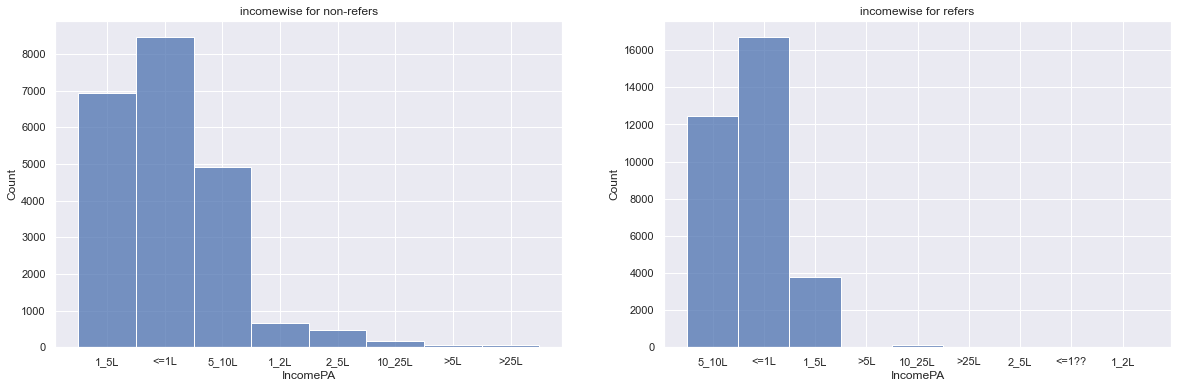

In [47]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(20,6)})
sns.histplot(df_model[df_model["target"] == 0], 
             x = "IncomePA", palette = "rocket" , ax=ax[0]).set_title("incomewise for non-refers")


sns.histplot(df_model[df_model["target"] == 1], 
             x = "IncomePA", palette = "rocket" , ax=ax[1]).set_title("incomewise for refers")

Text(0.5, 1.0, 'agewise for refers')

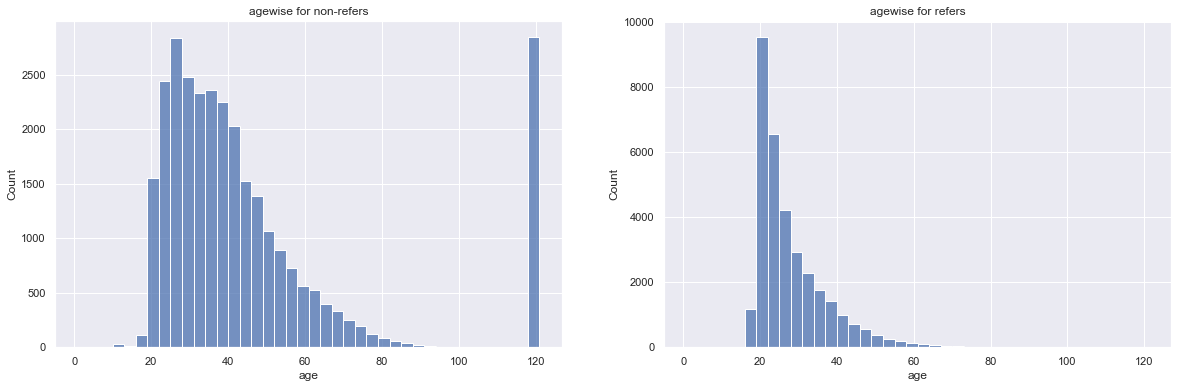

In [48]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(20,6)})
sns.histplot(df_model[df_model["target"] == 0], 
             x = "age" ,bins = 40,  ax=ax[0]).set_title("agewise for non-refers")


sns.histplot(df_model[df_model["target"] == 1], 
             x = "age", bins = 40,  ax=ax[1]).set_title("agewise for refers")

Text(0.5, 1.0, 'distribution of referreres login in last year')

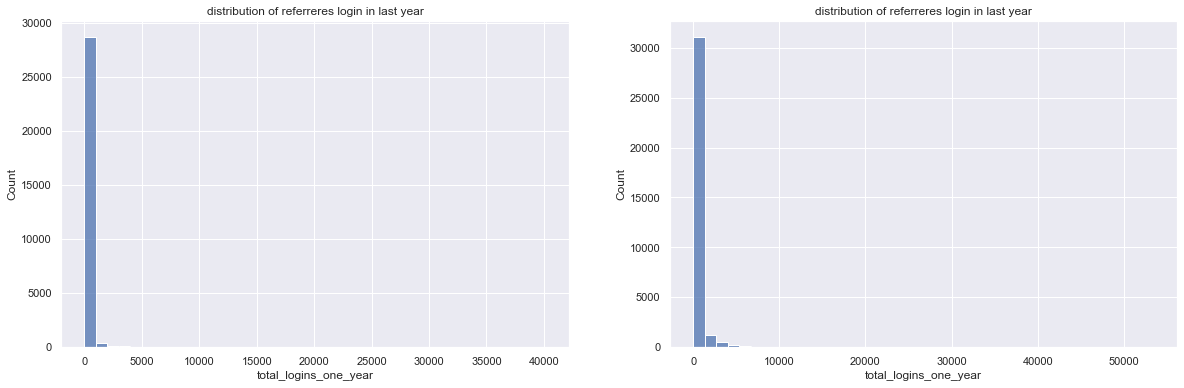

In [54]:
fig, ax =plt.subplots(1,2)

sns.histplot(df_model[df_model["target"] == 0], 
             x = "total_logins_one_year" ,bins = 40, 
            ax=ax[0]).set_title("distribution of referreres login in last year")
sns.histplot(df_model[(df_model["target"] == 1)], 
             x = "total_logins_one_year" ,bins = 40, 
            ax=ax[1]).set_title("distribution of referreres login in last year")

In [49]:
df_model

,cm_cd,cm_mobile,refer_count,activation_count,IncomePA,cm_occup,E2Channel,IsKarvy,KRA YN,age,months_since_last_login,months_since_last_trade,dp_holding,total_logins_one_year,total_trades_one_year,target
0,10501992,8269199070,0,0.0,1_5L,S,CAL,0,N,29.0,1.533705,17.796872,NaN,7.0,0.0,0
1,11154521,8104713532,0,0.0,<=1L,P,CAT,0,N,23.0,132.000000,132.000000,0.0,0.0,0.0,0
2,SHIRAZUI,8133007526,2,1.0,5_10L,P,CAT,0,Y,21.0,6.133384,0.515198,0.0,13.0,1.0,1
3,11975396,9755396681,0,0.0,1_5L,S,CAT,0,N,44.0,132.000000,132.000000,0.0,0.0,0.0,0
4,MSHAHRO7,7781919824,1,0.0,<=1L,S,CAT,0,N,22.0,20.359548,132.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62877,92516982,9251698256.0,3,1.0,1_5L,S,CAT,0,N,35.0,132.000000,132.000000,0.0,0.0,1.0,1
62878,17482977,7008477088.0,1,0.0,5_10L,P,CAT,0,N,72.0,0.515198,0.745183,0.0,1400.0,56.0,1
62879,70629679,9971235083.0,1,0.0,<=1L,S,CAT,0,Y,19.0,0.778038,0.810892,0.0,6.0,1.0,1
62880,114847,NaN,0,0.0,NaN,NaN,Brp,0,N,121.0,132.000000,132.000000,NaN,0.0,0.0,0


Text(0.5, 1.0, 'KRA customer  referrers')

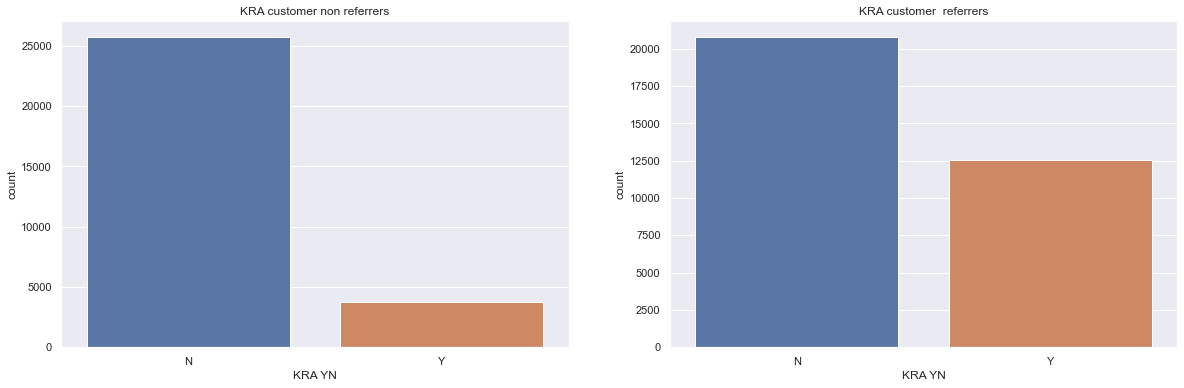

In [74]:
fig, ax =plt.subplots(1,2)

sns.countplot( x = "KRA YN", data = df_model[df_model["target"] == 0], ax = ax[0], 
             order = df_model["KRA YN"].value_counts().index).set_title("KRA customer non referrers")

sns.countplot(x = "KRA YN" , data = df_model[df_model["target"] == 1], 
              ax = ax[1], order = df_model["KRA YN"].value_counts().index).set_title("KRA customer  referrers")

Text(0.5, 1.0, 'Karvy customer  referrers')

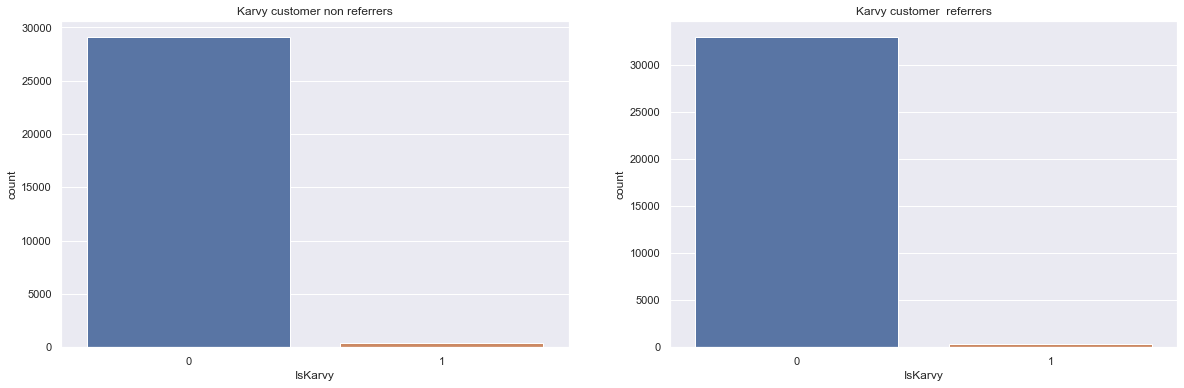

In [79]:
fig, ax =plt.subplots(1,2)

sns.countplot( x = "IsKarvy", data = df_model[df_model["target"] == 0], ax = ax[0], 
             order = df_model["IsKarvy"].value_counts().index).set_title("Karvy customer non referrers")

sns.countplot(x = "IsKarvy" , data = df_model[df_model["target"] == 1], 
              ax = ax[1], order = df_model["IsKarvy"].value_counts().index).set_title("Karvy customer  referrers")

In [87]:
df_model["target"] = df_model["activation_count"]/df_model["refer_count"]

In [90]:
bins = [0, 0.25, 0.5, 1]
df_model['target'] = pd.cut(df_model['target'], bins)

In [91]:
bins = [18, 24,30, 40, 50, 80]
df_model['age_binned'] = pd.cut(df_model['age'], bins)




<bound method Axes.set_title of <AxesSubplot:xlabel='age_binned', ylabel='count'>>

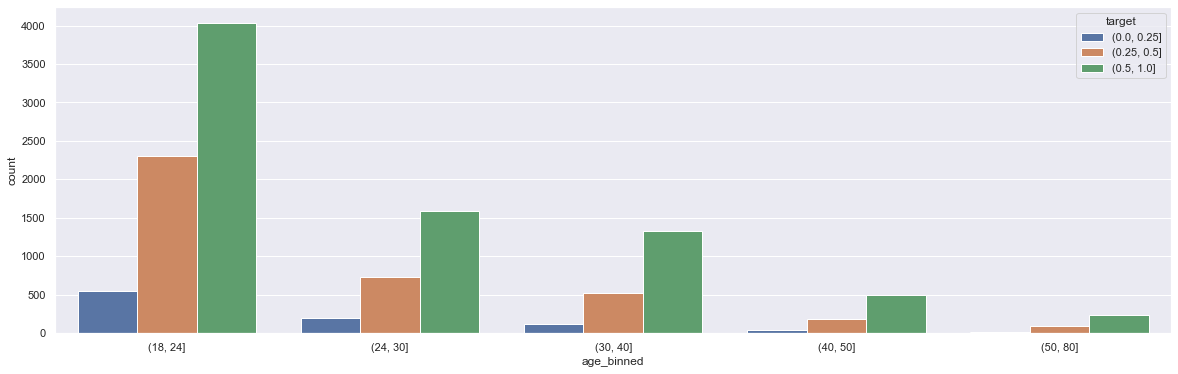

In [92]:
sns.countplot(x = "age_binned", data = df_model, hue = "target").set_title

In [85]:
df_model["target"].value_counts()

(0.5, 1.0]     8032
(0.25, 0.5]    4022
(0.0, 0.25]     966
Name: target, dtype: int64